In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency, stats, norm, shapiro
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv("fatal-police-shootings-data.csv")
df.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,1/2/2015,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,1/2/2015,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,1/3/2015,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,1/4/2015,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,1/4/2015,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10429 entries, 0 to 10428
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10429 non-null  int64  
 1   date                        10429 non-null  object 
 2   threat_type                 10361 non-null  object 
 3   flee_status                 8932 non-null   object 
 4   armed_with                  10218 non-null  object 
 5   city                        10355 non-null  object 
 6   county                      5737 non-null   object 
 7   state                       10429 non-null  object 
 8   latitude                    9301 non-null   float64
 9   longitude                   9300 non-null   float64
 10  location_precision          9301 non-null   object 
 11  name                        10100 non-null  object 
 12  age                         10046 non-null  float64
 13  gender                      104

In [5]:
def extract_year(s):
    a = s.split("/")
    return a[2]

In [6]:
df["year"] = df["date"].astype(str).apply(extract_year)
df["year"]

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
10424    2024
10425    2024
10426    2024
10427    2024
10428    2024
Name: year, Length: 10429, dtype: object

## Chi-square Test

In [7]:
df["race_split"] = df["race"].str.split(";")
df["race_split"]

0        [A]
1        [W]
2        [H]
3        [W]
4        [H]
        ... 
10424    NaN
10425    [B]
10426    NaN
10427    NaN
10428    NaN
Name: race_split, Length: 10429, dtype: object

In [8]:
df_expanded = df.explode("race_split")
df_expanded

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,...,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids,year,race_split
0,3,1/2/2015,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,...,Tim Elliot,53.0,male,A,not_available,True,False,73,2015,A
1,4,1/2/2015,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,...,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70,2015,W
2,5,1/3/2015,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,...,John Paul Quintero,23.0,male,H,not_available,False,False,238,2015,H
3,8,1/4/2015,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,...,Matthew Hoffman,32.0,male,W,not_available,True,False,196,2015,W
4,9,1/4/2015,point,not,other,Evans,Weld,CO,40.383937,-104.692261,...,Michael Rodriguez,39.0,male,H,not_available,False,False,473,2015,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10424,11283,12/30/2024,undetermined,NaN,knife,Sacramento,Sacramento,CA,38.494163,-121.355656,...,NaN,38.0,male,NaN,NaN,True,True,1069,2024,NaN
10425,11284,12/30/2024,threat,foot,gun,Orlando,Orange,FL,28.580447,-81.445027,...,Timothy Woods,26.0,male,B,photo,False,False,482,2024,B
10426,11286,12/30/2024,undetermined,NaN,unknown,West Point,Davis,UT,41.122823,-112.070576,...,Nathan Paul,43.0,male,NaN,NaN,True,False,1450,2024,NaN
10427,11285,12/31/2024,threat,not,gun,Chattanooga,Hamilton,TN,35.044135,-85.149670,...,James Junior Holder,41.0,male,NaN,NaN,False,False,750,2024,NaN


In [9]:
df_expanded.race_split.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [10]:
cross_tb = pd.crosstab(df_expanded["race_split"], df_expanded["gender"])
cross_tb

gender,female,male,non-binary
race_split,,,
A,11,174,0
B,87,2398,0
H,60,1660,1
N,8,138,0
O,4,33,0
W,254,4395,2


In [11]:
cross_tb_cp = cross_tb.copy()

In [12]:
cross_tb_cp["total_row"] = [row["female"] + row["male"] + row["non-binary"] for index, row in cross_tb_cp.iterrows()]
cross_tb_cp

gender,female,male,non-binary,total_row
race_split,,,,
A,11,174,0,185
B,87,2398,0,2485
H,60,1660,1,1721
N,8,138,0,146
O,4,33,0,37
W,254,4395,2,4651


In [13]:
def f():
    res = []
    for col in cross_tb_cp.columns:
        a = 0
        for val in cross_tb_cp[col]:
            a += val
        res.append(a)
    return res

In [14]:
cross_tb_cp.loc["total_col"] = f()
cross_tb_cp

gender,female,male,non-binary,total_row
race_split,,,,
A,11,174,0,185
B,87,2398,0,2485
H,60,1660,1,1721
N,8,138,0,146
O,4,33,0,37
W,254,4395,2,4651
total_col,424,8798,3,9225


In [17]:
chi2, p, dof, expected = chi2_contingency(cross_tb)
print(f"Chi2: {chi2}")
print(f"p-value: {p}")
print(f"dof: {dof}")
print(expected)

Chi2: 25.30035253144997
p-value: 0.004804349770607557
dof: 10
[[8.50298103e+00 1.76436856e+02 6.01626016e-02]
 [1.14215718e+02 2.36997615e+03 8.08130081e-01]
 [7.91007046e+01 1.64133962e+03 5.59674797e-01]
 [6.71046070e+00 1.39242060e+02 4.74796748e-02]
 [1.70059621e+00 3.52873713e+01 1.20325203e-02]
 [2.13769539e+02 4.43571794e+03 1.51252033e+00]]


In [18]:
expected_round = np.round(expected).astype(int)
print(expected_round)
print(cross_tb)

[[   9  176    0]
 [ 114 2370    1]
 [  79 1641    1]
 [   7  139    0]
 [   2   35    0]
 [ 214 4436    2]]
gender      female  male  non-binary
race_split                          
A               11   174           0
B               87  2398           0
H               60  1660           1
N                8   138           0
O                4    33           0
W              254  4395           2


In [19]:
residuals = (cross_tb - expected) / np.sqrt(expected)
print(residuals)

gender        female      male  non-binary
race_split                                
A           0.856320 -0.183457   -0.245281
B          -2.546577  0.575646   -0.898961
H          -2.147629  0.460597    0.588580
N           0.497804 -0.105259   -0.217898
O           1.763253 -0.385059   -0.109693
W           2.751580 -0.611370    0.396375


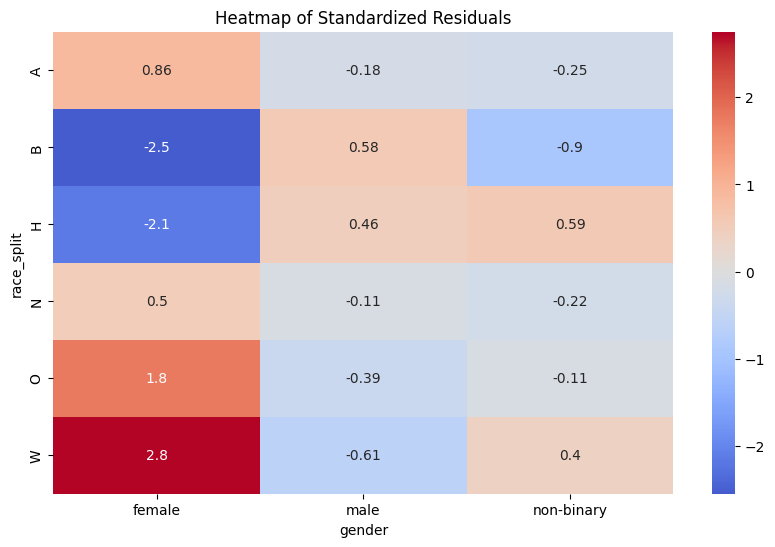

In [36]:
plt.figure(figsize=(10, 6))
sns.heatmap(residuals, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap of Standardized Residuals")
plt.savefig("heatmap.png",dpi=300)
plt.show()

## Visulzation

In [27]:
race_gender = df_expanded[["race_split","gender"]].reset_index()
race_gender.dropna(axis=0,inplace=True)

In [35]:
race_gender.shape

(9225, 3)

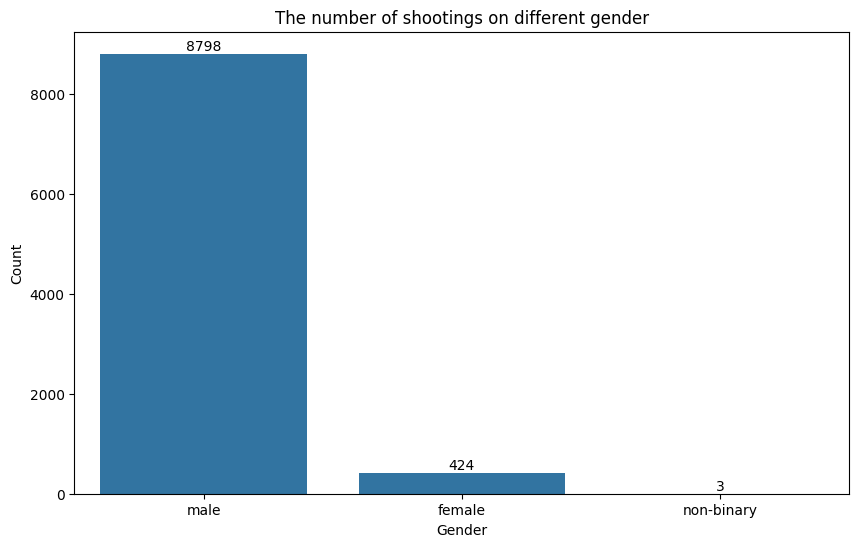

In [37]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=race_gender, x="gender")
ax.bar_label(ax.containers[0])
# Set labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("The number of shootings on different gender")
# plt.legend(title="Gender")
plt.savefig("barchar1.png",dpi=300)
plt.show()

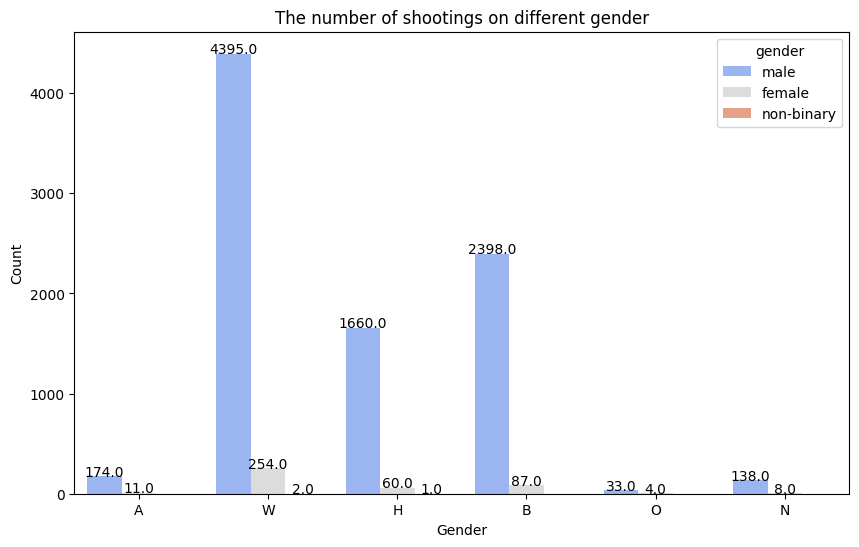

In [38]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=race_gender, x="race_split", hue="gender", palette="coolwarm")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                height, ha="center")
# ax.bar_label(ax.containers[0])
# Set labels and title
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("The number of shootings on different gender")
# plt.legend(title="Gender")
plt.savefig("barchart2.png",dpi=300)
plt.show()

In [30]:
race = race_gender["race_split"].unique()

In [31]:
cross_tb_cp

gender,female,male,non-binary,total_row
race_split,,,,
A,11,174,0,185
B,87,2398,0,2485
H,60,1660,1,1721
N,8,138,0,146
O,4,33,0,37
W,254,4395,2,4651
total_col,424,8798,3,9225


In [32]:
labels = cross_tb_cp.index.to_list()
labels

['A', 'B', 'H', 'N', 'O', 'W', 'total_col']

In [33]:
sizes = cross_tb_cp["total_row"].to_list()
sizes

[185, 2485, 1721, 146, 37, 4651, 9225]

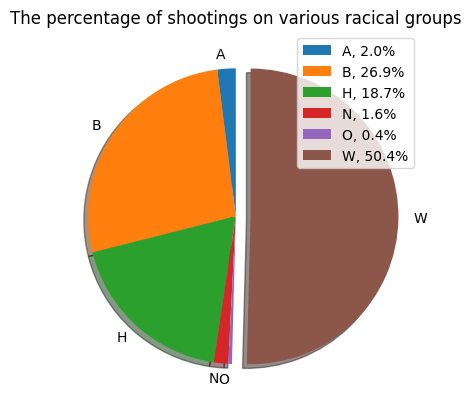

In [39]:
explode = (0, 0, 0, 0, 0, 0.1)

fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(sizes[:-1], explode=explode, labels=labels[:-1], autopct='',
       shadow=True, startangle=90)
ax.legend(patches, [f'{l}, {s:1.1f}%' for l, s in zip(labels, [x / sum(sizes[:-1]) * 100 for x in sizes[:-1]])], loc="upper right")
plt.title("The percentage of shootings on various racical groups")
plt.savefig("piechart.png",dpi=300)
plt.show()